In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
from R_CNN.AlexNet.AlexNet import AlexNet
from R_CNN.AlexNet.data_loader import create_dataset_CIFAR10

In [12]:
num_classes = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = AlexNet(num_classes).to(device)

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

In [14]:
num_epochs = 20
train_loss_list, train_acc_list, val_loss_list, val_acc_list = [], [], [], []

In [15]:
train_loader, test_loader, label_names = create_dataset_CIFAR10()

Files already downloaded and verified
Files already downloaded and verified


In [16]:
for epoch in range(num_epochs):
    train_loss, train_acc, val_loss, val_acc = 0, 0, 0, 0

    model.train()

    for i, (images, labels) in enumerate(train_loader):
        # GPUに送信
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)

        train_loss += loss.item()
        train_acc += (outputs.max(dim=1)[1] == labels).sum().item()

        loss.backward()
        optimizer.step()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)

    model.eval()
    with torch.no_grad():
      for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        val_loss += loss.item()
        val_acc += (outputs.max(1)[1] == labels).sum().item()

    avg_val_loss = val_loss / len(test_loader.dataset)
    avg_val_acc = val_acc / len(test_loader.dataset)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, val_loss: {avg_val_loss:.4f}, val_acc: {avg_val_acc:.4f}')

    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)


Epoch [1/20], Loss: 0.0090, val_loss: 0.0092, val_acc: 0.1108
Epoch [2/20], Loss: 0.0087, val_loss: 0.0080, val_acc: 0.2434
Epoch [3/20], Loss: 0.0073, val_loss: 0.0066, val_acc: 0.3796
Epoch [4/20], Loss: 0.0063, val_loss: 0.0063, val_acc: 0.4303
Epoch [5/20], Loss: 0.0057, val_loss: 0.0054, val_acc: 0.4935
Epoch [6/20], Loss: 0.0052, val_loss: 0.0053, val_acc: 0.5081
Epoch [7/20], Loss: 0.0048, val_loss: 0.0050, val_acc: 0.5508
Epoch [8/20], Loss: 0.0043, val_loss: 0.0049, val_acc: 0.5579
Epoch [9/20], Loss: 0.0040, val_loss: 0.0045, val_acc: 0.6036
Epoch [10/20], Loss: 0.0037, val_loss: 0.0039, val_acc: 0.6575
Epoch [11/20], Loss: 0.0035, val_loss: 0.0036, val_acc: 0.6855
Epoch [12/20], Loss: 0.0032, val_loss: 0.0035, val_acc: 0.6889
Epoch [13/20], Loss: 0.0031, val_loss: 0.0032, val_acc: 0.7167
Epoch [14/20], Loss: 0.0029, val_loss: 0.0033, val_acc: 0.7195
Epoch [15/20], Loss: 0.0027, val_loss: 0.0029, val_acc: 0.7438
Epoch [16/20], Loss: 0.0025, val_loss: 0.0031, val_acc: 0.7309
E

In [32]:
def visualize(train_loss_list, train_acc_list, validation_loss_list, validation_acc_list):
        """
        左にloss, 右にaccuracyを可視化
        """
        fig, axes = plt.subplots(1, 2, figsize=(16, 9))
        
        # 左にlossを描画
        ax = axes[0]
        ax.plot(train_loss_list, label='train loss')
        ax.plot(validation_loss_list, label='validation loss')

        ax.set_xlabel('epoch')
        ax.set_ylabel('loss')
        ax.set_title('Training and validation loss')

        ax.grid()

        # 右にaccuracyを描画
        ax = axes[1]
        ax.plot(train_acc_list, label='train accuracy')
        ax.plot(validation_acc_list, label='validation accuracy')

        ax.set_xlabel('epoch')
        ax.set_ylabel('accuracy')
        ax.set_title('Training and validation accuracy')
        ax.grid()

        fig.tight_layout()

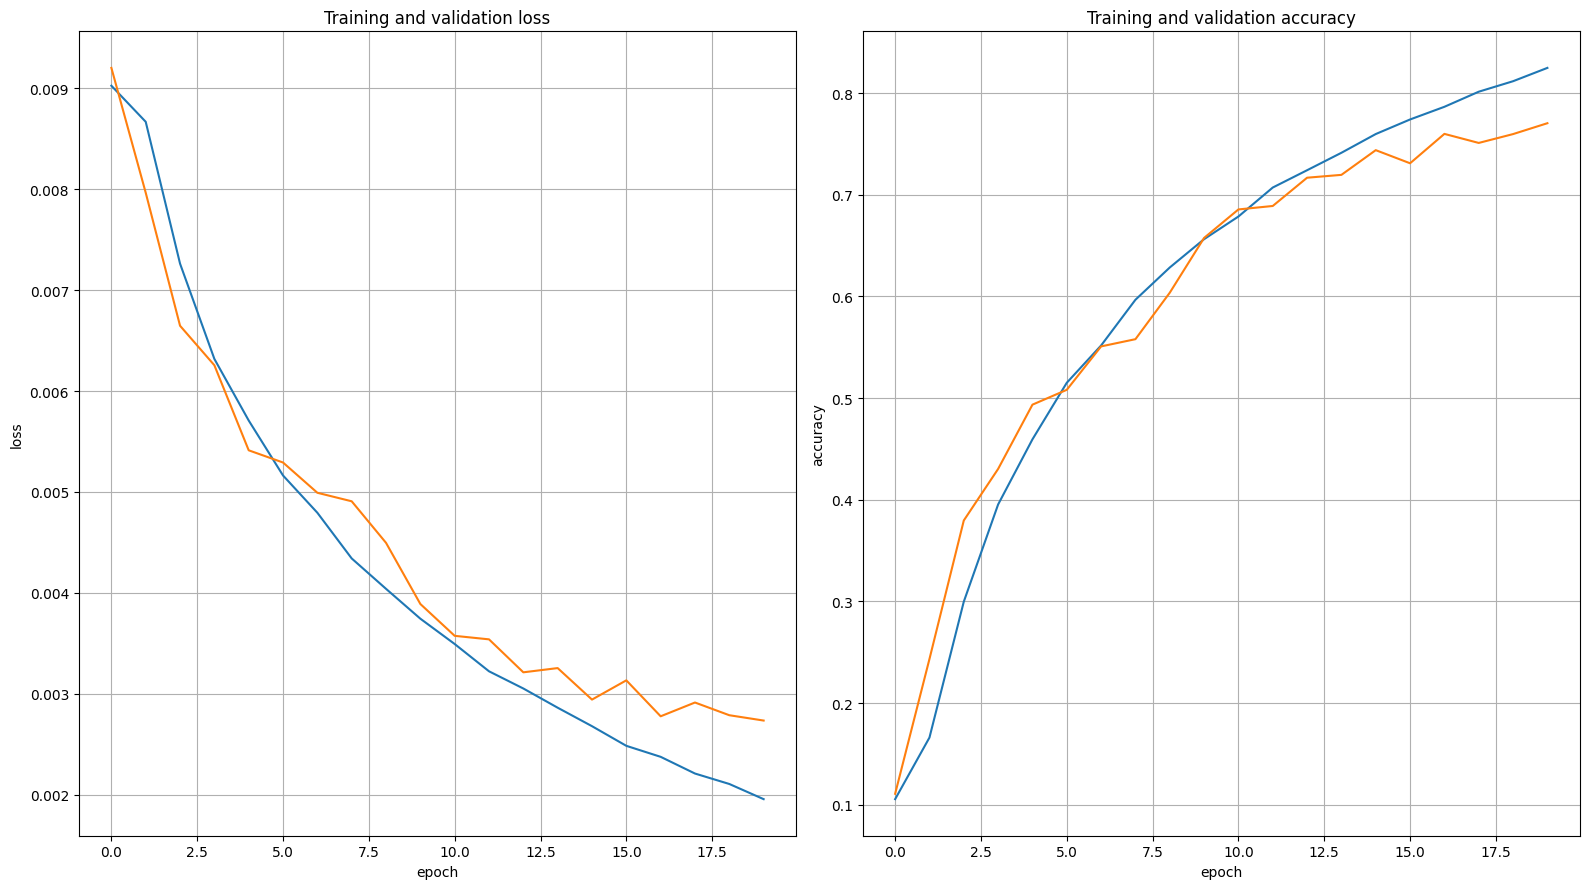

In [33]:
visualize(train_loss_list, train_acc_list, val_loss_list, val_acc_list)

In [ ]:
# Train using Mish with Softmax, BatchNormarization and Normarization(whole dataset).
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()
 
plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation accuracy')
plt.grid()

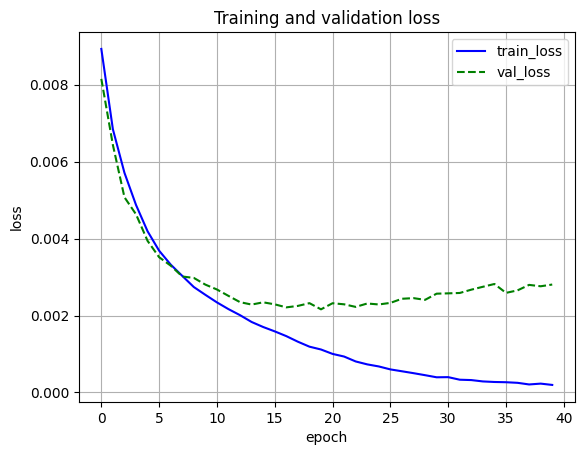

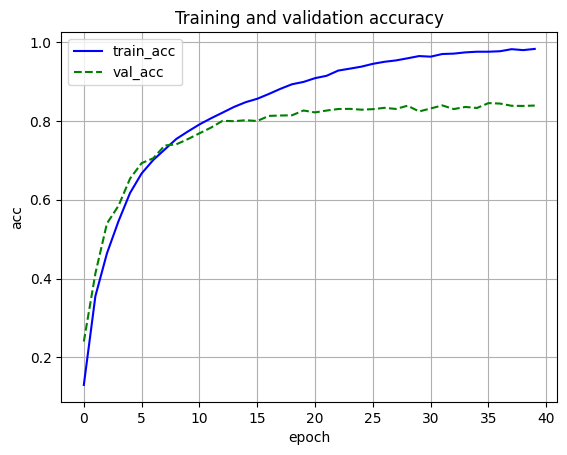

In [61]:
# Train using Mish with BatchNormarization and Normarization(whole dataset).
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()
 
plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation accuracy')
plt.grid()

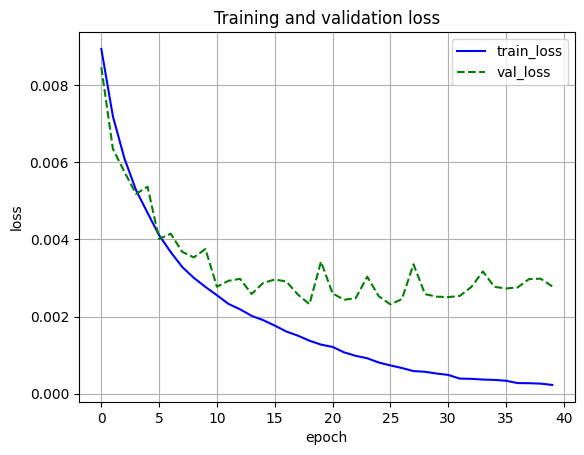

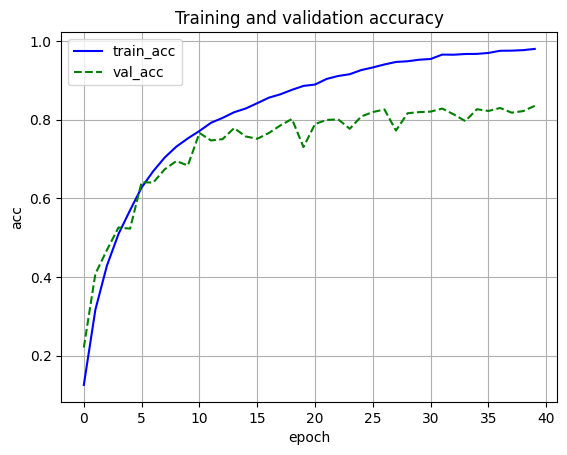

In [50]:
# Train using Mish with BatchNormarization.
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()
 
plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation accuracy')
plt.grid()

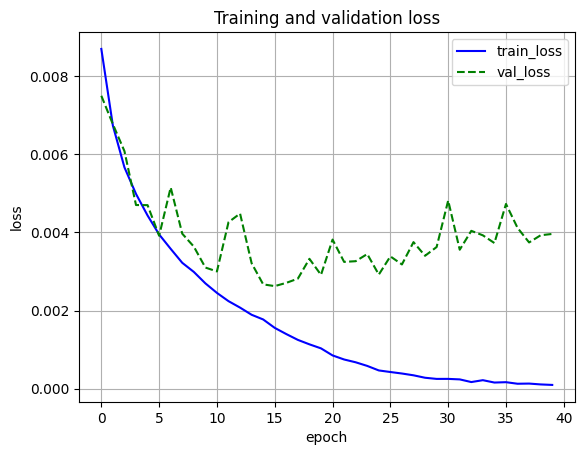

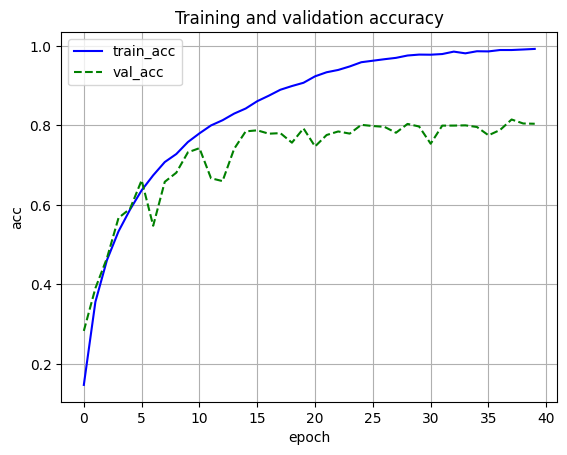

In [44]:
# Train using ReLu with BatchNormarization.
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()
 
plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation accuracy')
plt.grid()

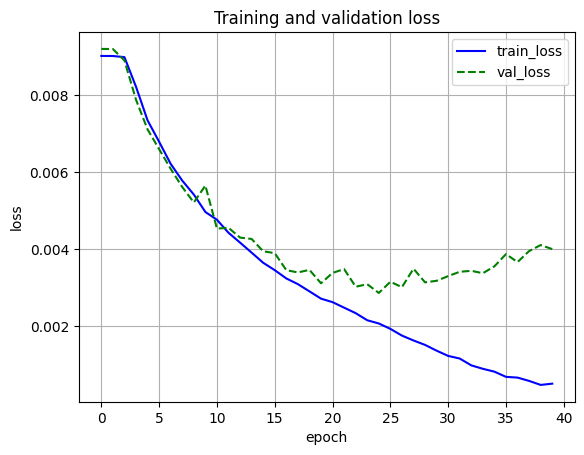

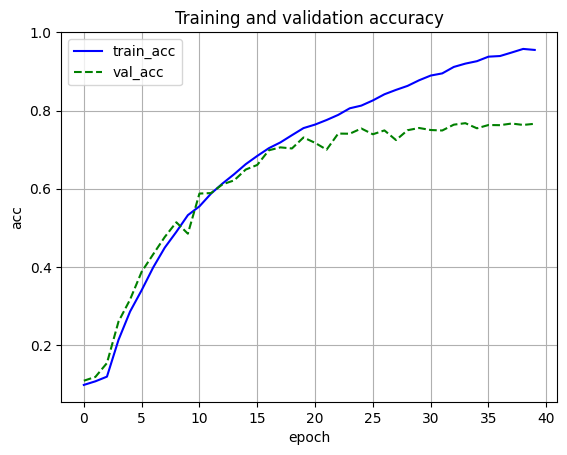

In [38]:
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()
 
plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation accuracy')
plt.grid()

In [2]:
from tqdm import tqdm

In [3]:
test = [i for i in tqdm(range(1000))]

100%|██████████| 1000/1000 [00:00<?, ?it/s]


In [10]:
from pathlib import Path
import time

import cv2
import numpy as np
from tqdm import tqdm
from tqdm.contrib import tenumerate

In [11]:
TRAIN_DIR = Path('./dataset/ILSVRC/train')

In [14]:
start = time.time()

image_paths = sorted(TRAIN_DIR.glob(f'**/*.jpg'))

# ここまでで1min程度
# -------------------------------- #
images = []
for max_index, image_path in tenumerate(image_paths):
    if max_index >= 100000:
        break
    
    images.append(cv2.imread(str(image_path)))

# images = [cv2.imread(str(image_path)) for image_path in tqdm(image_paths, desc='Getting images')]
image_num = max_index
for i in tqdm(range(10000000)):
    if i % 1000000 == 0:
        print(time.time() - start)
    random_index = np.random.randint(0, image_num)
    image = images[random_index]

time.time() - start

  0%|          | 0/544546 [00:00<?, ?it/s]

  1%|          | 66788/10000000 [00:00<00:25, 384426.51it/s]

432.273396730423


 11%|█         | 1086491/10000000 [00:01<00:13, 675573.18it/s]

433.85708928108215


 21%|██        | 2107197/10000000 [00:03<00:11, 679955.32it/s]

435.348224401474


 31%|███▏      | 3130011/10000000 [00:04<00:10, 676436.09it/s]

436.822313785553


 41%|████      | 4086111/10000000 [00:06<00:08, 670944.40it/s]

438.2984936237335


 51%|█████     | 5109895/10000000 [00:07<00:07, 680236.57it/s]

439.777480840683


 61%|██████    | 6076445/10000000 [00:09<00:05, 684640.98it/s]

441.2334885597229


 71%|███████   | 7106784/10000000 [00:10<00:04, 680353.04it/s]

442.70867109298706


 81%|████████  | 8074171/10000000 [00:11<00:02, 688285.70it/s]

444.1621763706207


 91%|█████████ | 9110044/10000000 [00:13<00:01, 689237.04it/s]

445.62043929100037


100%|██████████| 10000000/10000000 [00:14<00:00, 675472.53it/s]


447.0802083015442

In [18]:
start = time.time()

for _ in tqdm(range(10000000)):
    if i % 1000000 == 0:
        print(time.time() - start)
    random_index = np.random.randint(0, image_num)
    image = cv2.imread(str(TRAIN_DIR / f'{str(random_index).zfill(8)}.jpg'))

time.time() - start

  0%|          | 27050/10000000 [01:29<9:12:52, 300.64it/s] 


KeyboardInterrupt: 

In [19]:
images.__sizeof__()

800968

cv2.imread・・・250~300it/s

リストへのアクセス（length = 100,000）・・・700,000弱it/s